# Density-sensitive emission lines in a T Tauri star

- **author**: Hans Moritz Günther, MIT (hgunther@mit.edu)
- **last updated**: Dec 2018
- **tested with**: CIAO 4.11
- **Contact cxchelp@head.cfa.harvard.edu for any questions.**

I will describe how I calculate the required Chandra/HETG exposure time for a proposal that looks at a density-sensitive line ratio in a classical T Tauri star (CTTS).  Every science case is different, but even if your proposal looks at very different objects, this discussion should give you some ideas how to estimate the required exposure time for any proposal that looks at emission lines.


## How to use this document

I describe how to estimate the exposure time for one particular proposal. This example is based on a real proposal that I submitted first in 2007. The Chandra time allocation committee (TAC) rejected the proposal and made some suggestions for improvement. I modified the proposal and submitted it again in 2008. The second time around, it was accepted and observed. The observation is [available in the Chandra archive](https://cda.harvard.edu/chaser/startViewer.do?menuItem=details&obsid=9938).

I provide this discussion in the hope it will be useful; it is not a definitive guide on how to write the feasibility section of a proposal. The text includes some code examples using Python and the spectral fitting software [Sherpa](http://cxc.harvard.edu/sherpa/).  The code examples are not required to follow the text, they are just intended to be helpful if you need to perform similar calculations. Simulations could equally be done in [XSPEC](https://heasarc.gsfc.nasa.gov/xanadu/xspec/) or [ISIS](http://space.mit.edu/asc/isis/) if you are more familiar with those programs.

This document is a static version of a [jupyter notebook](https://jupyter.org/). On this page, you can see the text, the code used for simulations, and figures I made. However you can also download the notebook and execute the code step-by-step on your own computer, modify it for your own needs and see how the results change.

While the code is written in Python, this notebook is not an [introduction to Python for astronomers](https://python4astronomers.github.io/), nor is it an [introduction to Sherpa](http://cxc.harvard.edu/sherpa/). 

The button below can be used to toggle the display of Python code on and off.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.prompt').hide();
 } else {
 $('div.input').show();
 $('div.prompt').show();
}
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the display of raw code.">
</form>''')

<div class="alert alert-danger">
<h2>Caveats</h2>
<ul>
    <li><strong>Do not plagiarize!</strong> Chandra may use plagiarism detection software and reject proposals found to plagiarize. Do not copy and paste the text from this webpage simply changing the numbers; instead, use it as a guide how you might present your own calculations.</li>
    <li>Chandra is heavily oversubscribed and each TAC is different. There is much competition. Just because a proposal with this feasibility was accepted in 2008 does not guarantee that will we judged as sufficient in any other year.</li>
    <li>The views presented here are my own and do not constitute an official CXC policy on how to write a feasibility section.</li>
</ul>
</div>

### Detailed instructions how to download and run this code yourself

Starting with CIAO 4.11, the [jupyter notebook](https://jupyter.org/) is included in the CIAO distribution. You can download this notebook and some of the associated example files from https://github.com/HETGS/proposalguides/archive/master.zip.

Go to the directory where you saved the file and start the Jupyter notebook server there:

    cd /path/to/download
    unzip master.zip
    cd proposalguides-master/emissionlines/
    jupyter notebook 
    
Remember to replace the path in the commands above with the actual path on your system where the downloaded the file and where CIAO is installed. Also, if you use bash instead of tcsh use, call `ciao.bash` instead of `ciao.csh`. See the [CIAO thread on using CIAO](http://cxc.harvard.edu/ciao/threads/ciao_startup/) for details.

[Sherpa](http://cxc.harvard.edu/sherpa/) supports different plotting backends. Plotting in this notebook is done with the [matplotlib library](https://matplotlib.org/index.html). If want to follow along line-by-line you need to set your default plotting to "pylab" (a matplotlib module) in your Sherpa configuration file. See the [Sherpa help](http://cxc.harvard.edu/sherpa/ahelp/sherparc.html) on how to do that.

In [2]:
import sherpa
print('This notebook was last run with Sherpa in CIAO version: ', sherpa._version.version_version)

This notebook was last run with Sherpa in CIAO version:  ciao4.11


## Some background on the specific science question

### T Tauri stars
In the early stages of their evolution, low-mass stars are surrounded by circumstellar disks. These disks are the origin of planetary systems. Over a time scale of a few Myr the disks disappear because some mass is accreted onto planets, some is blown out of the system by winds and some falls into the central star itself. The circumstellar disk does not reach down to the central star. Instead it is truncated by the magnetic field of the central star around the co-rotation radius where the Keplerian period of the disk matches the stellar rotation period. The gas at the inner disk edge is ionized and, assuming a simple dipolar configuration for the stellar magnetic field, will be funneled onto the stellar surface along the magnetic fields lines, impacting the star in distinct accretion hot spots. This "magnetically-funneled accretion" scenario explains some of the basic observables from T Tauri stars. This is an active field of research, but no more than this basic concept is required to understand the idea behind the proposal.

On the stellar surface, a strong accretion shock forms where the kinetic energy of the infalling gas in converted into heat. For T Tauri stars, the temperature reached a few MK, enough to produce strong thermal X-ray emission. If the can measure the total energy flux, we can deduce the mass accretion rate; if can also measure the density of the emitting gas, we can calculate what fraction of the stellar surface is covered with accretion shocks.

### Density sensitive emission lines
Thermal emission from He-like ions, i.e. those with only two electrons, contains a triplet of emission lines. Lines from O VII, Ne IX, Mg XI, and Si XIII are visible with the HETG. The triplets consists of a resonance ($r$), an intercombination ($i$) and a forbidden line ($f$). The upper levels of the $i$ and $f$ lines are relatively stable. If the plasma is dense, collisions can excite electrons from the upper level of the $f$ line to the upper level of the $i$ line. Thus, the $f/i$ ratio is a direct measure of the density in the emitting region. Strong UV fields can have the same effect. The $r/(f+i)$ ratio is a measure of the temperature of the gas, but the range of the $r/(f+i)$ ratios is small in the limited temperature range where Ne IX contributes significantly to the emission. 

This diagnostic is a valuable tool and has been used for the study of stellar coronae since Chandra was launched (e.g. [Ness et al., 2004](https://ui.adsabs.harvard.edu/#abs/2004A&A...427..667N)). Some examples of its application to T Tauri stars are [Kastner et al. (2002)](https://ui.adsabs.harvard.edu/#abs/2002ApJ...567..434K/abstract), [Günther et al. (2007)](https://ui.adsabs.harvard.edu/#abs/2007A&A...466.1111G/abstract), and more recently [Brickhouse et al. (2012)](https://ui.adsabs.harvard.edu/#abs/2012ApJ...760L..21B/abstract). 

O VII, Ne IX, Mg XI, and Si XIII form at different temperatures and are sensitive to different density ranges. Line ratios for each temperature and density can be predicted from databases like [AtomDB](http://atomdb.org/) or [CHIANTI](http://chiantidatabase.org/). In accretion shocks from T Tauri stars we expect O VII and Ne IX.

## Steps to assess the technical feasibility

Almost every proposal requires roughly the following steps:

### Which science problem do I want to solve and what do I need to measure?
That's up to you. In my experience, science questions often come up a result of previous work, e.g. in the example I present here I studied classical T Tauri stars for my PhD thesis and then wondered what happens when they get older. How does accretion stop?

The diagnostic that I need to answer this question is the density of the emitting region.

### What's been done before?
If you have not done so, look at the literature for the kind of object you have in mind. In this case, I knew about observations of classical T Tauri stars on one hand and main-sequence stars on the other, so I know the two limiting cases. Are older T Tauri stars like the one or the other or something in between? 

Often, you will find that previous observations have looked at similar objects. That's good news because then you can estimate the required observing time from those existing datasets. In the science justification text, you will have to describe why the observation you propose is still needed (e.g. you propose to observe an object that is older / younger / less-massive / more-massive than the existing sample) and what we can learn that we can't with just the data that's already in the archive.

### What source(s) can be used to answer the science question?
Search for a catalog of objects (in this example, I looked for a catalog of T Tauri stars in the known close-by star forming regions) and find the ones that are X-ray bright. Observations with the gratings require fairly bright sources, so you can probably find your source(or something that's very similar in existing Chandra or XMM-Newton imaging data or at least the [ROSAT All Sky Survey (RASS)](http://vizier.u-strasbg.fr/viz-bin/VizieR-2?-source=+J%2FA%2BA%2F588%2FA103%2Fcat2rxs). For this example here, I decided that [IM Lup](http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=im+lup&submit=SIMBAD+search) is a good target to look at. It's close-by and its H$\alpha$ flux is just on the boundary between accreting and non-accreting. 

### Has your source been observed before?
Check [the Chandra archive](https://cda.harvard.edu/chaser/) and the [XMM-Newton archive](http://nxsa.esac.esa.int/nxsa-web/#search). If you find grating data, check it out and see if you really need to propose for new data. For the example, I describe here, there is XMM-Newton imaging data (ObsIDs 0303900301, 0303900401, and 0303900501) with my target IM Lup is on the chip, but no grating spectrum.

## Which instrument is the best for this science?

This choice depends a lot on the individual science case. All instrument are described in the [Proposer's Observatory Guide](http://cxc.harvard.edu/proposer/POG/). More links and tools are listed on http://cxc.harvard.edu/proposer/

Our goal is the measure the density of the accretion region. This can be done in Ne IX or O VII. O VII is seen around 22 $\unicode{x212B}$, Ne IX around 13.5 $\unicode{x212B}$. Ideally, we would want to see both triplets in the same observation, but the Ne IX triplet coincides with a number of Fe lines, so if we decide that this is the region we want to observe, we need to use the HETG to cleanly separate the lines. On the other hand, the HETG effective area is very low at the wavelength region around O VII. This could be observed better with the LETG. However, there are drawbacks, too: LETG/HRC-S has a much higher background than observations that use ACIS and using LETG/ACIS to observe O VII also gives a low effective area at O VII because of the contamination on ACIS. 

There is an [online tool](http://cxc.harvard.edu/cgi-bin/prop_viewer/build_viewer.cgi?ea) to compare the effective area of one instrument at different times in the Chandra livetime (change the "cycle"), or different instruments in the same cycle.

A quick look at the XMM data (more details below) shows us that IM Lup has a reasonable absorbing column density and thus there are fewer counts in the soft X-rays. That favors looking mostly at Ne IX and using the HETG. So, for now, we will continue with that.

## Calculate number of counts we need

If the emission from IM Lup is coronal, the $f/i$ ratio will be in the low-density limit. Typical main-sequence stars have values of 2 or larger ([Ness et al., 2004](https://ui.adsabs.harvard.edu/#abs/2004A&A...427..667N)). The Ne IX $f/i$ ratios seen in CTTS are around 1 (some of references are given above). We decide to write our proposal to distinguish these two ratios on the 90% confidence level. Why 90%? Personally, I think anything less is too low (no referee will accept a paper that's just $1\sigma$ significant), and anything much higher will need much longer observation times. Would that be justified? In this particular case, I feel that it's a little too much to go for e.g. 99% significance. Since all stars are a little different, I'd much rather observe a few stars to the 90% level than a single one to the 99% level, just to find out later that it's time-variable and we happened to look at the wrong time.
However, choosing the significance level you go for is somewhat arbitrary.

So, how many counts do we need in the triplet? We want to constrain the $f/i$ ratio. There are different ways to determine the number of counts that we need. Here, we just do some numerical Monte-Carlo experiments.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
true_f = 2.
true_i = 1.

def draw_poisson(totalcounts, true_i, true_f, n=10000, conf=10.):
    i_obs = np.random.poisson(true_i / (true_i + true_f) * totalcounts, size=n)
    f_obs = np.random.poisson(true_f / (true_i + true_f) * totalcounts, size=n)
    # if i_obs is 0, this ratio won't work, but this certainly means we have too few counts.
    # To avoid any nons, we just set i_obs clsoe to infinity in this case - which leads to a ratio
    # that will be counted as "count rate too low for our purpose"
    i_obs[i_obs == 0] = 100000
    ratio = f_obs / i_obs
    return np.percentile(ratio, conf)

counts = np.arange(0, 100, 5)
lower_bound = [draw_poisson(c, true_i, true_f) for c in counts]

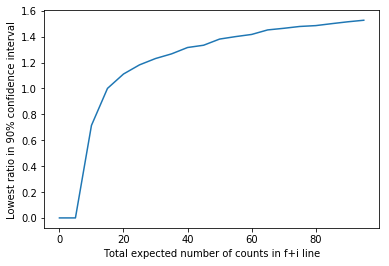

In [5]:
plt.plot(counts, lower_bound)
plt.xlabel('Total expected number of counts in f+i line')
plt.ylabel('Lowest ratio in 90% confidence interval');

**Figure: "How many counts do we need?**  Assuming a true $f/i=2$, we take the expected number of counts, draw 10000 times from the Poisson distribution and look for the value that just includes the lowest 10% of our draws. If that value is larger than 1, then we can exclude an $f/i$ ratio of 1 at the 90% confidence level.

A look at the plot shows us that we need more than 20 counts. Technically, 20.5 or 21 would be would be OK according to the plot, but for such a crude estimate we better round up, say to 25 counts.

The ratio of $r/(f+i)$ in the triplet is moderately temperature dependent between about 0.8 and 1.2. Thus, we need 60 counts in total in the Ne IX triplet to have at least 25 in $f+i$. Note that we did not take into account background here, because we know it's very low in the HETG, we ignored the continuum, because we know it's weak in these stars, and we assumed that contamination by Fe lines is not an issue because they will be resolved by the HETG.

Each of those assumptions could be challenged, but after looking at several T Tauri spectra they seemed reasonable to me and I did not want to spend extra space in the proposal to discuss this in more depth. There is always a trade-off. On the one hand, you want to describe everything that's needed to estimate the exposure time, on the other hand, there is limited space in a proposal, so you don't want to simulate and discuss things in too much detail if they are not very relevant.

## Simulate the observed spectrum

To simulate the observed spectrum, we first need a spectral model. Fortunately, we have the XMM-Newton data from IM Lup that we can use for that purpose. Since this is just a proposal, we will not reprocess that XMM data ourselves, but download the pipeline processed data and the canned response matrix files from the XMM archive. IM Lup was observed three times by XMM and there is data in the PN, MOS1, and MOS2 for each observation. For simplicity we will use a single PN spectrum below and I include this data in the download file with this notebook. [The Sherpa documentation explains how to fit multiple datasets at once](http://cxc.harvard.edu/sherpa/threads/simultaneous/) for a fit that makes use of all the available data. 

In [6]:
from sherpa.astro import ui

In [7]:
ui.load_data(1, './data/XMM/IMLup/P0303900301PNS003SRSPEC0002.FTZ')

read ARF file ./data/XMM/IMLup/P0303900301PNS003SRCARF0002.FTZ
read RMF file ./data/XMM/IMLup/epn_ff20_sdY4.rmf
read background file ./data/XMM/IMLup/P0303900301PNS003BGSPEC0002.FTZ


Similarly, we will plot a well-studied classical T Tauri star (TW Hya) for comparison. Again, I just downloaded pipeline processed data from the XMM archive.

In [8]:
ui.load_data(2, './data/XMM/TWHya/P0112880201PNS003SRSPEC0001.FTZ')

read ARF file ./data/XMM/TWHya/P0112880201PNS003SRCARF0001.FTZ
read RMF file ./data/XMM/TWHya/epn_ff20_sdY9.rmf
read background file ./data/XMM/TWHya/P0112880201PNS003BGSPEC0001.FTZ


In [9]:
ui.set_analysis('energy')

In [10]:
for i in [1, 2]:
    ui.group_counts(i, 25)
    
ui.ignore(None, .3)
ui.ignore(5., None)

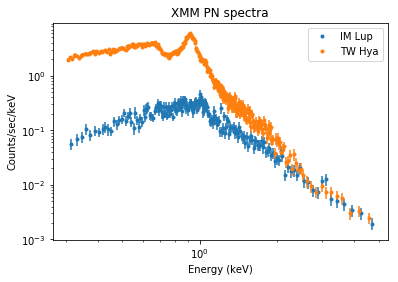

In [11]:
# Use Sherpa commands to plot
ui.plot_data(1)
ui.plot_data(2, overplot=True)
# Then get the axis object for that plot and modify plot using normal matplotlib to change the appearance
ax = plt.gca()
ax.loglog()
ax.set_title('XMM PN spectra')
lines = ax.get_lines()
legend = ax.legend([lines[1], lines[3]], ['IM Lup', 'TW Hya'])

**Figure: PN spectra**: Observed XMM-Newton EPIC/PN spectra from our target IM Lup and a well-studied T tauri star (TW Hya) that we use for comparison.

Now, we need a spectral model for IM Lup, so that we can simulate a grating spectrum later. Give how good the XMM data is, we can fit two temperature components.

In [12]:
ui.set_source(1, "xsphabs.a1 * (xsvapec.v1 + xsvapec.v2)")

In [13]:
# Let's match the abundances for all three components
for component in [v2]:
    # Parameters 1-13 are abundances
    for i in range(1, 14):
        # Set up the link
        component.pars[i].val = v1.pars[i]

# Set some elements free for the fit
v1.Ne.frozen = False

v1.Fe.frozen = False

# set some reasonable starting value for the fit
v1.kT = .5
v2.kT = 1.

In [14]:
ui.subtract(1)
ui.fit(1)

Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 2.66712e+09
Final fit statistic   = 237.527 at function evaluation 302
Data points           = 187
Degrees of freedom    = 180
Probability [Q-value] = 0.00261382
Reduced statistic     = 1.31959
Change in statistic   = 2.66712e+09
   a1.nH          0.953456     +/- 0.0455994   
   v1.kT          0.10848      +/- 0.00260839  
   v1.Ne          0.238482     +/- 0.106846    
   v1.Fe          1.26637      +/- 0.192208    
   v1.norm        0.695587     +/- 0.308126    
   v2.kT          1.03055      +/- 0.0409518   
   v2.norm        0.000886854  +/- 5.86062e-05 


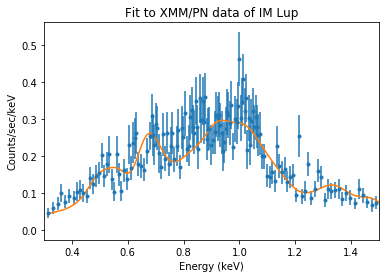

In [15]:
ui.plot_fit(1)
ax = plt.gca()
#ax.loglog()
ax.set_xlim([.3, 1.5])
out = ax.set_title('Fit to XMM/PN data of IM Lup')

**Figure: IM Lup data with fit** XMM-Newton EPIC/PN data from IM Lup fitted with a two-temperature model. The fit is done for the entire spectrum, but this plot zooms in on the low-energy part most relevant to our proposal.

The plot above zooms in on the region around the Ne IX triplet around 0.9 keV. The fit looks very reasonable, in particular in that region. Also, a look at the fitted numbers matches what we typically see in T Tauri stars and what we can reasonably assume about IM Lup. The Ne abundance is enhanced, and the Fe abundance is depleted. If we used the MOS1 and MOS2 data from this observation and the other two observations, we could investigate the low-energy spectrum around 0.5 keV in more detail, maybe adding another temperature component or tweaking abundances. However, overall the fit looks good and so we decide to use this model to predict how a grating spectrum of IM Lup would look like.

At 1 keV the effective area in the HETG/HEG is small, so almost all signal will come from the HETG/MEG orders -1 and +1. These two orders might be different if one of them falls into a chip gap or one of them falls onto a front-side illuminated ACIS-S chip and the other one on the backside illuminated chip. So, we want to simulate both those orders. We download sample grating arf and rmf files [from the Chandra proposers website](http://cxc.harvard.edu/caldb/prop_plan/grating/index.html).

In [16]:
# You can your your webbrower to download them, but I like Python ;-)
import urllib.request 
import os
# Here for cycle 20 proposals
website = 'http://cxc.harvard.edu/caldb/prop_plan/grating/CY20/'
for name in ['aciss_meg1_cy20.grmf', 'aciss_meg-1_cy20.grmf', 'aciss_meg1_cy20.garf', 'aciss_meg-1_cy20.garf']:
    urllib.request.urlretrieve(website + name, name)

We are now ready to simulate the spectra. We set the source model to the model we fitted to IM Lup above and simulate observations for 300 ks. That number is a simple guess, based on the fact that TW Hya seems an order of magnitude brighter than IM Lup around the Ne IX triplet, but I also know that 50~ks of Chandra data from TW Hya has more than the 60 counts we need ([Kastner et al., 2002](https://ui.adsabs.harvard.edu/#abs/2002ApJ...567..434K/abstract)).

In [17]:
ui.set_source(10, "xsphabs.a1 * (xsvapec.v1 + xsvapec.v2)")
ui.set_source(11, "xsphabs.a1 * (xsvapec.v1 + xsvapec.v2)")
ui.fake_pha(10, 'aciss_meg1_cy20.garf', 'aciss_meg1_cy20.grmf', 3e5)
ui.fake_pha(11, 'aciss_meg-1_cy20.garf', 'aciss_meg-1_cy20.grmf', 3e5)

In [18]:
ui.set_analysis('wave')

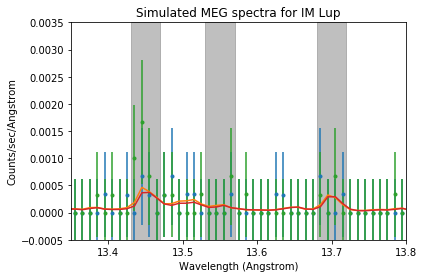

In [19]:
ui.group_width(10, 2)
ui.group_width(11, 2)

ui.plot_fit(10)
ui.plot_fit(11, overplot=True)
# Then get the axis object for that plot and modify plot using normal matplotlib to change the appearance
ax = plt.gca()
ax.set_xlim(13.35, 13.8)
ax.set_ylim(-0.0005, 0.0035)
ax.set_title('Simulated MEG spectra for IM Lup')
lines = ax.get_lines()

ax.axvspan(13.43, 13.47, color='0.5', alpha=.5)
ax.axvspan(13.53, 13.57, color='0.5', alpha=.5)
out = ax.axvspan(13.68, 13.72, color='0.5', alpha=.5)

**Figure: Simulated spectrum** Simulated MEG spectra for orders -1 and +1. Data points with error bars are simulated counts. The orange and red lines show the models going into the simulation. The location of the three lines in the Ne IX triplet is highlighted in gray.

We see in the plot that the Fe lines do not contribute much to the observed signal. If this turns out to be wrong later,  we can resolve them in the data. For now, we just add up all the counts in the plotted range for both spectra and see if our simulated observing time is sufficient to reach 60 counts. If the number of counts is below 60, we increase the simulated time, if it is too high, we reduce the simulated time until it works out.

There are some approximations in here, so we don't aim for an exact solution. We are not going to write a proposal for e.g. 453.27 ks, instead we would round that to 450 ks.

In [20]:
dat = ui.get_data(10)
wave = dat.get_x()
index = (wave > 13.4) & (wave < 13.8)
dat2 = ui.get_data(11)
wave2 = dat2.get_x()
index2 = (wave2 > 13.4) & (wave2 < 13.8)

print('Total number of counts in the wavelength region shown in the plot above')
print('Both orders combined: ', dat.counts[index].sum() + dat2.counts[index2].sum())

Total number of counts in the wavelength region shown in the plot above
Both orders combined:  36.0


This number is less than we like. We simulated 300 ks above, so we should really try out 350 ks or 400 ks. (Note that the counts are drawn from a Poisson distribution, so even running the same simulation again will give you a different answer). We'll find that 350 ks or 400 ks are a good number for this proposal. When writing the proposal, I would include one or two plots from this analysis into the proposal, e.g. the PN spectra and the simulated spectrum. 

I've made the experience that TACs like to see simulated data because it gives them a quick, visual way to check if the signal will be good enough and you have a realistic chance to achieve your science goals. On the other hand, everybody writing a proposal is always pressed for space, so you have to decide if it's worth it.

## A few final thoughts


### How long should my observation be?
The short answer is "As long as it needs to be to answer your science question". There is no statistical correlation between proposal success rate and observation time. That does not mean that you should ask for more time than you need, it just means that you should not be afraid to ask for a lot of time if that's what it really takes to answer an important science question. 

### What to do if the time I calculate is really, really long?
If your estimate comes out far too long, longer then the longest proposal ever observed (I've made a simulation where I concluded that I need 10 Ms(!) for a single star), then it might not be worth your time to write a proposal for that. Instead, think about looking for different objects, or see if you can address your science question at a different wavelength (In the example above, we chose Ne IX over O VII, because observations using O VII would be unfeasible long.) or maybe with a different telescope.

### Special note: 350 or 400 ks?
Chandra has different categories for proposals depending on the time required where large (currently 400 ks and longer) and very large projects are treated differently in the review process. For a proposal right on the boundary, I recommend to study the [Chandra Call for proposals](http://cxc.harvard.edu/proposer/CfP/CfP.pdf) to decide between a normal and a large project.

## Supporting material

The IM Lup proposal discussed as an example here has been submitted to peer review and was accepted and observed by Chandra. 


<div class="alert alert-danger">
<strong>Do not plagiarize!</strong> Chandra may use plagiarism detection software and reject proposals found to plagiarize. Do not copy and paste the text from this webpage simply changing the numbers; instead, use it as a guide how you might present your own calculations.

Also, note that the Chandra effective area changes with time. At the time, we could get 60 counts in 150 ks, while it requires longer observations today.
</div>

You can find the pdf version of the real proposal on https://github.com/HETGS/proposalguides/blob/master/emissionlines/pdf/proposal.pdf .

The data on IM Lup has been published. As it turns out, IM Lup was less bright during the new Chandra observation than  in the XMM-Newton data that we used to estimate the exposure time and thus the results are not 90% significant. Such is live. The data are still useful. Keep in mind that we have more information than just the Ne IX triplet that we concentrated on for the proposal. We can measure temperatures and abundances, and make use of supporting ground-based optical data that helps us with the interpretation of the X-ray spectrum ([Günther et al., 2010](https://ui.adsabs.harvard.edu/#abs/2010A&A...519A..97G/abstract)).